In [1]:
import sys

!{sys.executable} -m pip install torch
!{sys.executable} -m pip install qiskit
!{sys.executable} -m pip install pylatexenc
!{sys.executable} -m pip install torchvision
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install itertools

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8 -m pip install --upgrade pip' command.


You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8 -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
You should consider upgrading via the '/usr

In [2]:
import torch
from torch.autograd import Function
import torch.optim as optim
import torch.nn as nn

In [3]:
from qiskit import execute
from qiskit.circuit import Parameter,ControlledGate
from qiskit import Aer
import qiskit
import numpy as np

In [4]:
from tqdm import tqdm

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
np.random.seed = 42

NUM_QUBITS = 7
NUM_SHOTS = 5000
SHIFT = np.pi/4
LEARNING_RATE = 0.01
MOMENTUM = 0.5

SIMULATOR = Aer.get_backend('qasm_simulator')

In [7]:
# create list of all possible outputs of quantum circuit (2**NUM_QUBITS possible)
import itertools

def create_QC_OUTPUTS():
    measurements = list(itertools.product([0, 1], repeat=NUM_QUBITS))
    return [''.join([str(bit) for bit in measurement]) for measurement in measurements]

QC_OUTPUTS = create_QC_OUTPUTS()
print(QC_OUTPUTS)

['0000000', '0000001', '0000010', '0000011', '0000100', '0000101', '0000110', '0000111', '0001000', '0001001', '0001010', '0001011', '0001100', '0001101', '0001110', '0001111', '0010000', '0010001', '0010010', '0010011', '0010100', '0010101', '0010110', '0010111', '0011000', '0011001', '0011010', '0011011', '0011100', '0011101', '0011110', '0011111', '0100000', '0100001', '0100010', '0100011', '0100100', '0100101', '0100110', '0100111', '0101000', '0101001', '0101010', '0101011', '0101100', '0101101', '0101110', '0101111', '0110000', '0110001', '0110010', '0110011', '0110100', '0110101', '0110110', '0110111', '0111000', '0111001', '0111010', '0111011', '0111100', '0111101', '0111110', '0111111', '1000000', '1000001', '1000010', '1000011', '1000100', '1000101', '1000110', '1000111', '1001000', '1001001', '1001010', '1001011', '1001100', '1001101', '1001110', '1001111', '1010000', '1010001', '1010010', '1010011', '1010100', '1010101', '1010110', '1010111', '1011000', '1011001', '1011010'

# Contruct QuantumCircuit QFT Class

In [8]:
class QuantumCircuit:
    def __init__(self, n_qubits, backend, shots):
        self.n_qubits = n_qubits
        self.circuit = qiskit.QuantumCircuit(n_qubits)
        self.thetas = { k: Parameter('Theta'+str(k)) for k in range(self.n_qubits) }
        
        all_qubits = [i for i in range(n_qubits)]
        
        self.circuit.h(all_qubits)
        self.circuit.barrier()
        for k in range(n_qubits):
            self.circuit.ry(self.thetas[k], k)
            
        self.circuit.measure_all()
        
        self.backend = backend
        self.shots = shots
        
    def N_qubits_expectation_Z(self, counts, shots, n_qubits):
        expects = np.zeros(len(QC_OUTPUTS))
        for k in range(len(QC_OUTPUTS)):
            key = QC_OUTPUTS[k]
            perc = counts.get(key, 0) / shots
            expects[k] = perc
        return expects
    
    def run(self, i):
        params = i
        
        job_sim = execute(self.circuit, 
                          self.backend, 
                          shots = self.shots, 
                          parameter_binds = [{ self.thetas[k]: params[k].item() for k in range(self.n_qubits) }])
        
        result_sim = job_sim.result()
        counts = result_sim.get_counts(self.circuit)
        
        return self.N_qubits_expectation_Z(counts, self.shots, self.n_qubits)

Expected value for rotation [pi/4]: [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.000e-04 0.000e+00
 2.000e-04 0.000e+00 2.000e-04 0.000e+00 2.000e-04 0.000e+00 4.000e-04
 0.000e+00 1.400e-03 0.000e+00 0.000e+00 0.000e+00 2.000e-04 0.000e+00
 4.000e-04 2.000e-04 1.600e-03 0.000e+00 6.000e-04 8.000e-04 1.400e-03
 6.000e-04 2.400e-03 1.000e-03 1.080e-02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 4.000e-04 6.000e-04 2.600e-03 0.000e+00 4.000e-04
 2.000e-04 1.200e-03 0.000e+00 2.200e-03 2.200e-03 1.020e-02 4.000e-04
 6.000e-04 2.000e-04 4.000e-04 4.000e-04 8.000e-04 1.800e-03 8.200e-03
 2.000e-04 2.200e-03 2.600e-03 8.800e-03 2.000e-03 1.020e-02 1.040e-02
 5.840e-02 0.000e+00 0.000e+00 4.000e-04 2.000e-04 0.000e+00 6.000e-04
 2.000e-04 2.000e-03 0.000e+00 0.000e+00 6.000e-04 1.800e-03 2.000e-04
 2.800e-03 1.400e-03 9.800e-03 0.000e+00 2.000e-04 4.000e-04 1.800e-03
 2.000e-04 1.000e-03 2.000e-03 1.120e-02 0.000e+00 1.200e-03 1.800e-03
 8.200e-03 1.400e-03 1.120e-02 1.140e-02 

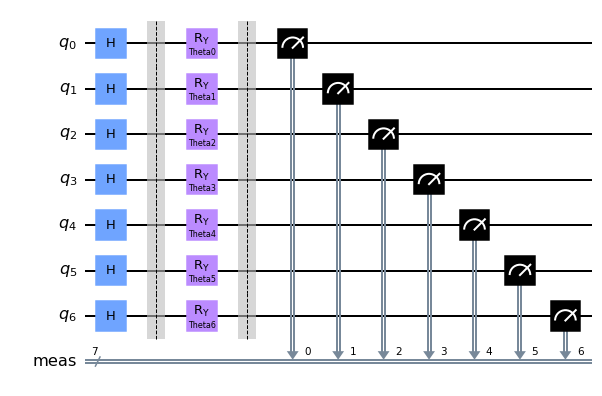

In [9]:
circuit = QuantumCircuit(NUM_QUBITS, SIMULATOR, NUM_SHOTS)
print(f'Expected value for rotation [pi/4]: {circuit.run(torch.Tensor([np.pi/4] * len(QC_OUTPUTS)))}')
circuit.circuit.draw(output='mpl')

In [10]:
class TorchCircuit(Function):
    @staticmethod
    def forward(ctx, i):
        if not hasattr(ctx, 'QuantumCircuit'):
            ctx.QuantumCircuit = QuantumCircuit(NUM_QUBITS, SIMULATOR, shots=NUM_SHOTS)
        
        exp_value = ctx.QuantumCircuit.run(i)
        
        result = torch.Tensor([exp_value])
        
        ctx.save_for_backward(result, i)
        
        return result
    
    @staticmethod
    def backward(ctx, grad_output):
        forward_tensor,i = ctx.saved_tensors
        
        input_numbers = i
        gradients = torch.Tensor()
        
        for k in range(NUM_QUBITS):
            shift_right = input_numbers.detach().clone()
            shift_right[k] = shift_right[k] + SHIFT
            
            shift_left = input_numbers.detach().clone()
            shift_left[k] = shift_left[k] - SHIFT
            
            expectation_right = ctx.QuantumCircuit.run(shift_right)
            expectation_left = ctx.QuantumCircuit.run(shift_left)
            
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            gradient = gradient / torch.norm(gradient)
            
            gradients = torch.cat((gradients, gradient.float()))
            
        result = torch.Tensor(gradients)
        
        return (result.float() * grad_output.float()).T

In [11]:
x = torch.tensor([np.pi/4] * NUM_QUBITS, requires_grad=True)
qc = TorchCircuit.apply

y1 = qc(x)
print(f'y1 after quantum layer: {y1}')
y1 = nn.Linear(2**NUM_QUBITS, 1)(y1.float())

y1.backward()
print(f'x.grad = {x.grad}')

y1 after quantum layer: tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e-04,
         0.0000e+00, 4.0000e-04, 0.0000e+00, 4.0000e-04, 0.0000e+00, 2.0000e-04,
         0.0000e+00, 2.0000e-04, 2.0000e-04, 1.2000e-03, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e-04, 2.0000e-04, 2.2000e-03,
         0.0000e+00, 4.0000e-04, 0.0000e+00, 1.8000e-03, 4.0000e-04, 2.4000e-03,
         6.0000e-04, 1.0200e-02, 0.0000e+00, 0.0000e+00, 2.0000e-04, 6.0000e-04,
         0.0000e+00, 2.0000e-04, 0.0000e+00, 1.2000e-03, 0.0000e+00, 2.0000e-04,
         4.0000e-04, 2.0000e-03, 4.0000e-04, 1.2000e-03, 2.0000e-03, 9.4000e-03,
         0.0000e+00, 2.0000e-04, 4.0000e-04, 1.8000e-03, 4.0000e-04, 4.0000e-04,
         2.0000e-03, 1.2800e-02, 2.0000e-04, 1.8000e-03, 2.0000e-03, 7.4000e-03,
         2.2000e-03, 1.0800e-02, 9.6000e-03, 5.7400e-02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 4.0000e-04, 0.0000e+00, 6.0000e-04, 6.0000e-04, 1.0000e-03,
    

100%|██████████| 100/100 [00:44<00:00,  2.24it/s]


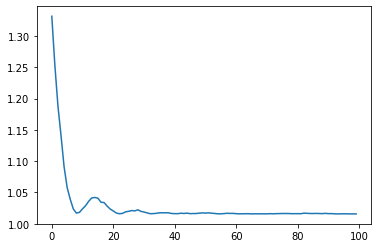

In [12]:
qc = TorchCircuit.apply

def cost(x):
    target = -1
    expval = qc(x)[0]
    
    val = sum([(i + 1) * expval[i] for i in range(2**NUM_QUBITS)]) / 2**NUM_QUBITS
    
    return torch.abs(target - val) ** 2, expval


x = torch.tensor([-np.pi/4] * NUM_QUBITS, requires_grad=True)
opt = optim.Adam([x], lr = 0.1)

num_epoch = 100

loss_list = []
expval_list = []

for i in tqdm(range(num_epoch)):
    opt.zero_grad()
    loss, expval = cost(x)
    loss.backward()
    
    opt.step()
    loss_list.append(loss.item())
    expval_list.append(expval)
    
plt.plot(loss_list)

In [13]:
from torch.functional import F

In [14]:
import numpy as np
import torchvision
from torchvision import datasets, transforms

n_samples = 100

stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32,padding=4,padding_mode="reflect"),
    transforms.ToTensor(),
    transforms.Normalize(*stats)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(*stats)
])

X_train = datasets.CIFAR100(root='./data', 
                                train=True,
                                download=True,
                                transform=train_transform)

idx = np.append(np.where(np.array(X_train.targets) == 0)[0][:n_samples], 
                np.where(np.array(X_train.targets) == 1)[0][:n_samples])


for i in range(2, 100):
    idx = np.append(idx, 
                np.where(np.array(X_train.targets) == i)[0][:n_samples])
    
X_train.data = X_train.data[idx]
X_train.targets = np.array(X_train.targets)[idx]


Files already downloaded and verified


In [15]:
train_loader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True, pin_memory=True)

In [16]:
n_samples = 50

X_test = datasets.CIFAR100(root='./data', 
                               train=False,
                               download=True,
                               transform=test_transform)

idx = np.append(np.where(np.array(X_test.targets) == 0)[0][:n_samples], 
                np.where(np.array(X_test.targets) == 1)[0][:n_samples])

for i in range(2, 100):
    idx = np.append(idx, 
                np.where(np.array(X_test.targets) == i)[0][:n_samples])

X_test.data = X_test.data[idx]
X_test.targets = np.array(X_test.targets)[idx]

Files already downloaded and verified


In [17]:
test_loader = torch.utils.data.DataLoader(X_test, batch_size=1, shuffle=True)

# Building network

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.pool = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(320, 50)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, NUM_QUBITS)
        self.qc = TorchCircuit.apply
        
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
#         self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
#         self.conv2_drop = nn.Dropout2d()
# #         self.fc1 = nn.Linear(320, 50)
#         self.fc1 = nn.Linear(500, 320)
#         self.fc2 = nn.Linear(320, 50)
#         self.fc3 = nn.Linear(50, NUM_QUBITS)
#         self.qc = TorchCircuit.apply
#         self.qcsim = nn.Linear(NUM_QUBITS, 1)
#         self.fc4 = nn.Linear(1, 3) # TODO: is this correct ???
        
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        x = np.pi*torch.tanh(x)
        x = self.qc(x[0])
        
        x = torch.sigmoid(x)
        x = torch.cat((x, 1-x), -1)
        
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
# #         x = x.view(-1, 320)
# #         x = x.view(-1, 500)
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.dropout(x, training=self.training)
#         x = self.fc3(x)
#         x = np.pi*torch.tanh(x)
        
#         MODE = 'QC'
        
#         if MODE == 'QC':
#             x = self.qc(x[0])
#         else:
#             x = self.qcsim(x)
            
#         x = torch.sigmoid(x)
#         x = torch.cat((x, 1-x), -1)
        
        return x
    
    
    def predict(self, x):
        
        pred = self.forward(x)
        ans = torch.argmax(pred[0]).item()
        
        return torch.tensor(ans)
    
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.001, momentum=0.9)

In [19]:
epochs = 10
loss_func = nn.CrossEntropyLoss()

loss_results = {
    'train': [],
    'val': []
}

acc_results = {
    'train': [],
    'val': []
}

loaders = {
    'train': train_loader,
    'val': test_loader
}

for epoch in range(epochs):
    total_loss = {
        'train': [],
        'val': []
    }
    
    total_acc = {
        'train': [],
        'val': []
    }
    
    
    for phase in ['train', 'val']:
        if phase == 'train':
            network.train(True)
        else:
            network.train(False)
        
        correct = 0
        number = 0
        
        for batch_idx, (data, target) in enumerate(loaders[phase]):
            optimizer.zero_grad()
            output = network(data)
            
            loss = loss_func(output, target)
            
            if phase == 'train':
                loss.backward()
                optimizer.step()

            total_loss[phase].append(loss.item())

            _, predicted = torch.max(output.data, 1)
            number += target.size(0)
            correct += (predicted == target).sum().item()
            
        loss_results[phase].append(sum(total_loss[phase]) / len(total_loss[phase]))
        acc_results[phase].append(100 * correct / number)

    progress = 100.0 * (epoch + 1) / epochs
    
    print(f'Training [{int(progress)}%]\tTraining loss {loss_results["train"][-1]}\tValidation loss {loss_results["val"][-1]}\tTraining acc {acc_results["train"][-1]}\tValidation acc {acc_results["val"][-1]}')
    

Training [10%]	Training loss 5.542187563323974	Validation loss 5.542346883106232	Training acc 1.41	Validation acc 1.3
Training [20%]	Training loss 5.541667251110077	Validation loss 5.540070280265808	Training acc 1.81	Validation acc 2.66
Training [30%]	Training loss 5.539837114810943	Validation loss 5.5386079357147215	Training acc 2.85	Validation acc 3.5
Training [40%]	Training loss 5.539298181962967	Validation loss 5.537749668121338	Training acc 3.09	Validation acc 4.0
Training [50%]	Training loss 5.538762279081345	Validation loss 5.537517365169525	Training acc 3.35	Validation acc 3.84
Training [60%]	Training loss 5.538100641584396	Validation loss 5.537183185100555	Training acc 3.5	Validation acc 3.88
Training [70%]	Training loss 5.53786409497261	Validation loss 5.538119075012207	Training acc 3.74	Validation acc 3.94
Training [80%]	Training loss 5.538045371723175	Validation loss 5.536198644924164	Training acc 3.69	Validation acc 4.48
Training [90%]	Training loss 5.537188042402267	Valid

Text(0, 0.5, 'loss')

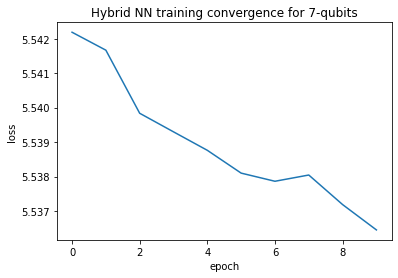

In [20]:
plt.plot(loss_results["train"])
plt.title(f'Hybrid NN training convergence for {NUM_QUBITS}-qubits')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

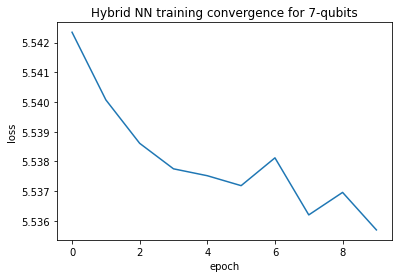

In [21]:
plt.plot(loss_results["val"])
plt.title(f'Hybrid NN training convergence for {NUM_QUBITS}-qubits')
plt.xlabel('epoch')
plt.ylabel('loss')

# Test accuracy

In [22]:
accuracy = 0
number = 0
for batch_idx, (data, target) in enumerate(test_loader):
    number += 1
    output = network.predict(data).item()
    accuracy += (output == target[0].item())*1

In [23]:
print(f'Performance on test data: {accuracy}/{number} = {accuracy/number*100}%')

Performance on test data: 245/5000 = 4.9%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KeyError: 90

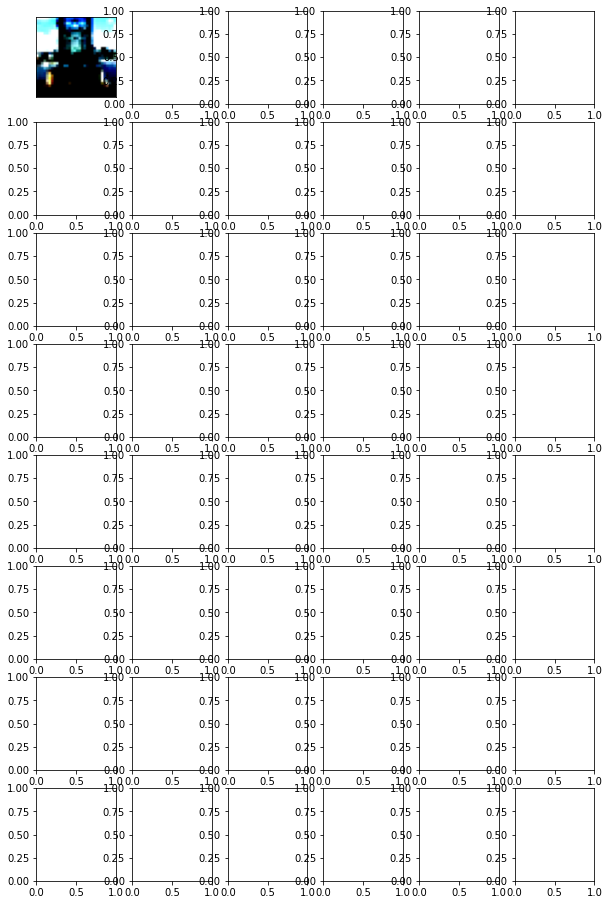

In [24]:
n_sample_shape = (8, 6)
count = 0
fig, axes = plt.subplots(nrows=n_sample_shape[0], ncols=n_sample_shape[1], figsize=(10, 2*n_sample_shape[0]))

classes_map = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

network.eval()
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_sample_shape[0]*n_sample_shape[1]:
            break
        
        prediction = network.predict(data).item()
        
        axes[count // n_sample_shape[1]][count % n_sample_shape[1]].imshow(data[0].numpy().squeeze().swapaxes(0,1).swapaxes(1,2))
        
        axes[count // n_sample_shape[1]][count % n_sample_shape[1]].set_xticks([])
        axes[count // n_sample_shape[1]][count % n_sample_shape[1]].set_yticks([])
        axes[count // n_sample_shape[1]][count % n_sample_shape[1]].set_title(classes_map[prediction])
        
        count += 1